### Import dependencies

In [1]:
import nibabel as nib
import os
import matplotlib.pyplot as plt
import numpy as np

test

In [2]:
model_name = 'FINAL_Postprocessed'
gt_folder = './predictions/'+model_name+'/gt/'
pred_folder = './predictions/'+model_name+'/pred'
image_folder = './database/testing/'

# Select first file
file_name = "patient148_frame01_gt.nii" #os.listdir(gt_folder)[10]
print(file_name)

patient148_frame01_gt.nii


In [3]:
image = nib.load(image_folder+"/"+file_name[0:10]+"/"+file_name[0:18]+".nii").get_fdata()
gt_mask = nib.load(gt_folder+"/"+file_name).get_fdata()
pred_mask = nib.load(pred_folder+"/"+file_name).get_fdata()


# Print the shape of the image data
print("Image shape:", image.shape)
print("Image shape:", gt_mask.shape)
print("Image shape:", pred_mask.shape)

Image shape: (192, 256, 8)
Image shape: (192, 256, 8)
Image shape: (192, 256, 8)


In [ ]:
# Define the classes to visualize
classes_to_visualize = [1, 2, 3]

# Extract the desired slice for visualization
slice_nr = 0
image_slice = image[:, :, slice_nr]
gt_slice = np.zeros_like(gt_mask[:, :, slice_nr])
pred_slice = np.zeros_like(pred_mask[:, :, slice_nr])

for class_index in classes_to_visualize:
    class_mask = (gt_mask[:, :, slice_nr] == class_index)
    gt_slice[class_mask] = class_index
    class_mask = (pred_mask[:, :, slice_nr] == class_index)
    pred_slice[class_mask] = class_index

# Calculate the difference per class
diff_slice = gt_slice - pred_slice

offset = 100
nonzero_indices = np.nonzero(diff_slice)
y_min, y_max = np.min(nonzero_indices[0])-offset, np.max(nonzero_indices[0]+offset)
x_min, x_max = np.min(nonzero_indices[1])-offset, np.max(nonzero_indices[1]+offset)

# Plot the MR image, ground truth mask, and difference mask
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot MR image
axs[0].imshow(image_slice, cmap='gray')
axs[0].set_title('MR Image')

# Plot ground truth mask
axs[1].imshow(image_slice, cmap='gray')
axs[1].imshow(np.ma.masked_where(gt_slice == 0, gt_slice), alpha=0.4, cmap='jet', vmin=1, vmax=3)
axs[1].set_title('Ground Truth Mask')

# Plot prediction mask
axs[2].imshow(image_slice, cmap='gray')
axs[2].imshow(np.ma.masked_where(pred_slice == 0, pred_slice), alpha=0.4, cmap='jet', vmin=1, vmax=3)
axs[2].set_title('Predicted Mask')

# Hide the axis numbers
for ax in axs:
    ax.set_axis_off()

# Autozoom on the region with non-zero mask values
for ax in axs:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)    

# Show the figure
plt.savefig("Worst.png")
plt.show()


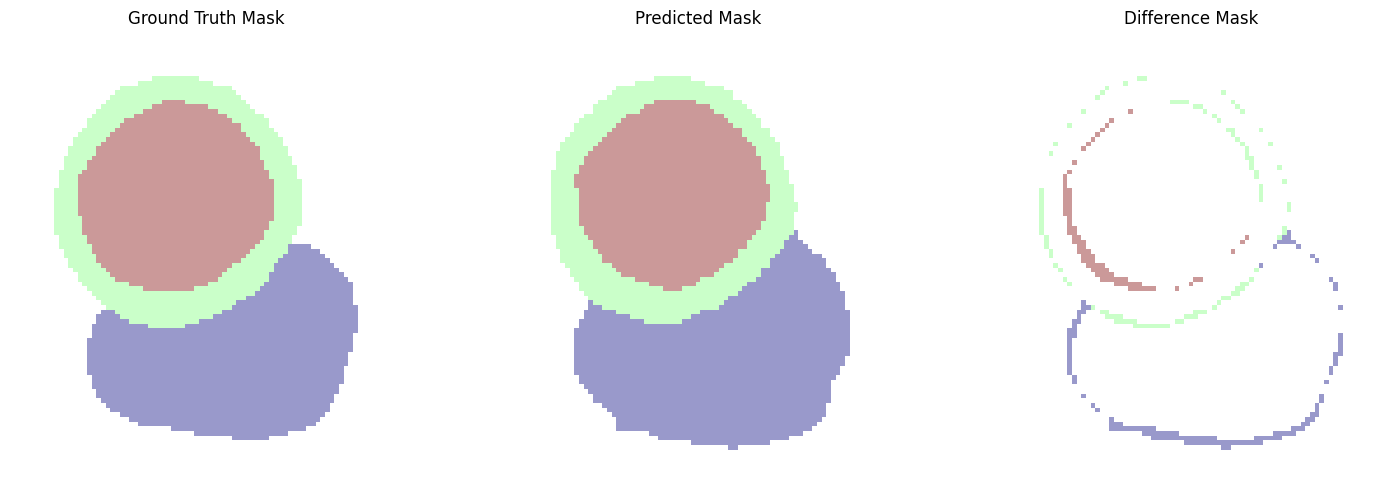

In [5]:
def generate_difference_mask(predicted_mask, ground_truth_mask):
    difference_mask = np.zeros_like(predicted_mask)

    for i in range(predicted_mask.shape[0]):
        for j in range(predicted_mask.shape[1]):
            if predicted_mask[i, j] == ground_truth_mask[i, j]:
                difference_mask[i, j] = 0
            elif ground_truth_mask[i, j] == 0:
                difference_mask[i, j] = predicted_mask[i, j]
            else:
                difference_mask[i, j] = ground_truth_mask[i, j]

    return difference_mask

diff_slice = generate_difference_mask(pred_slice, gt_slice)

offset = 10
nonzero_indices = np.nonzero(diff_slice)
y_min, y_max = np.min(nonzero_indices[0])-offset, np.max(nonzero_indices[0]+offset)
x_min, x_max = np.min(nonzero_indices[1])-offset, np.max(nonzero_indices[1]+offset)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot MR image
# Plot ground truth mask
axs[0].imshow(np.ma.masked_where(gt_slice == 0, gt_slice), alpha=0.4, cmap='jet', vmin=1, vmax=3)
axs[0].set_title('Ground Truth Mask')

# Plot prediction mask
axs[1].imshow(np.ma.masked_where(pred_slice == 0, pred_slice), alpha=0.4, cmap='jet', vmin=1, vmax=3)
axs[1].set_title('Predicted Mask')

# Plot difference mask
axs[2].imshow(np.ma.masked_where(diff_slice == 0, diff_slice), alpha=0.4, cmap='jet', vmin=1, vmax=3)
axs[2].set_title('Difference Mask')

# Autozoom on the region with non-zero mask values
for ax in axs:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# Hide the axis numbers
for ax in axs:
    ax.set_axis_off()

plt.savefig('Best_maskDifference_postprocessing.png')
plt.show()